#### Gradient Descent

Jay Urbain
12/10/2018

[Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) is an optimization algorithm used to find the local minimum of a function. It is commonly used in many different machine learning algorithms. 

Complete the code for the following functions below:   
- dLdw1() # partial derivative of the loss (cost) with respect to w1
- dLdw0() # partial derivative of the loss (cost) with respect to w0
- f() # linear regression prediction function
- cost() # cost function   

Note: plots

In [37]:
# loading necessary libraries and setting up plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# generate plots within notebook
%matplotlib inline

In [58]:
# Read dataset into a Pandas dataframe
f = "ex1data1.txt"
df = pd.read_csv(f, header=None, names=["X","Y"])

# verify
print(df.shape)
print(df.head())

# Convert pandas columns for X, Y into numpy arrays for processing
X=df.iloc[:,0].values
Y=df.iloc[:,1].values

print(type(X))
print(X.shape)
print(X.shape[0])
print(X[:5])
print(Y[:5])

(97, 2)
        X        Y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
<class 'numpy.ndarray'>
(97,)
97
[6.1101 5.5277 8.5186 7.0032 5.8598]
[17.592   9.1302 13.662  11.854   6.8233]


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


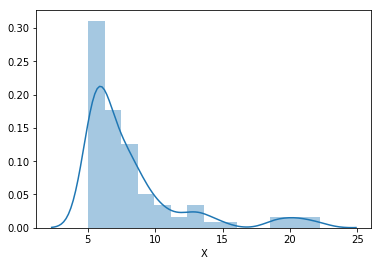

In [8]:
sns.distplot(df.X)

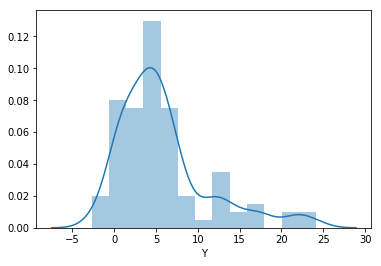

In [9]:
sns.distplot(df.Y)

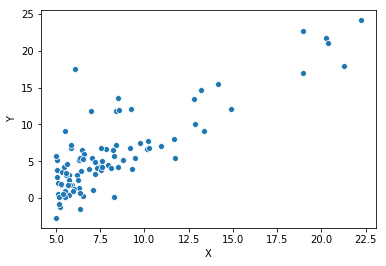

In [13]:
sns.scatterplot(x='X',y='Y',data=df)

#### Hyperparameter settings

In [14]:
# default settings, you need to determine optimal convergence settings
alpha = 0.01;   # learning rate
tol = 1e-11;    # tolerance to determine convergence
maxiter = 1000; # maximum number of iterations (in case convergence is not reached)
dispiter = 10;   # interval for displaying results during iterations

# track interations
iters = 0;
# parameter initialization
w0 = 0;
w1 = 0;

In [15]:
# track results for plotting parameter convergence
w0plot = [0.0]*(maxiter+1);
w1plot = [0.0]*(maxiter+1);
tplot  = [0]*(maxiter+1);
cplot  = [0]*(maxiter+1);

w0plot[:5]

[0.0, 0.0, 0.0, 0.0, 0.0]

#### Generate a scatter plot with labels and title to visualize the data

Plot X as a function of Y.

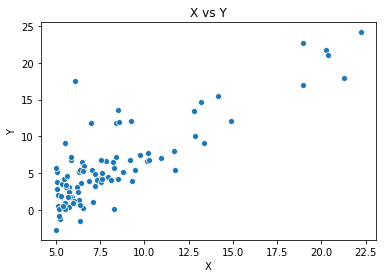

In [16]:
sns.scatterplot(x='X',y='Y',data=df)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y')
plt.show()

#### Functions you need to complete !!!

In [29]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
X    97 non-null float64
Y    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [19]:
# X = np.vstack(df.X)
# Y = np.vstack(df.Y)

In [34]:
# print(X.shape)
# print(Y.shape)

(97, 1)
(97, 1)


In [32]:
# m = np.linalg.lstsq(X,Y)[0]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [41]:
# lin_reg = LinearRegression()
# X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y, test_size=0.4, random_state=0)

In [42]:
# lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
# lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [45]:
# lin_reg.coef_

array([[1.22129509]])

In [46]:
# lin_reg.intercept_

array([-3.94929575])

In [52]:
# slope = lin_reg.coef_[0][0]
# print(slope)

1.2212950879192133


In [53]:
# intercept = lin_reg.intercept_[0]
# print(intercept)

-3.9492957489801395


In [56]:
# X.size

97

In [100]:
# linear regression predictive function
w0 = 0
w1 = 0
def f(x):
    ##################### 
    # fill this in
    return w1 * x + w0
    #####################
    
# partial derivative of the cost(loss) with respect to w1 (slogpe)
def dLdw1():
    ##################### 
    m = X.size
    return (1.0/m)*(((f(X)-Y)*X).sum())
    #####################
    
# partial derivative of the cost(loss) with respect to w0 (slogpe)
def dLdw0():
    ##################### 
    # fill this in
    sums = 0
    m = X.size
    return (1.0/m)*((f(X)-Y).sum())
    #####################
    
def cost():
    ##################### 
    # fill this in
    sum = 0
    m = X.size
    return (1/(2*m))*((f(X)-Y)**2).sum()
    #####################

In [101]:
dLdw1()

-65.32884974555671

In [102]:
dLdw0()

-5.839135051546392

#### Main training loop

In [103]:
# main algorithm loop starts here
iters = 0
maxiters = 10
while True:
    # Note: need to implement dLdw1 and dLdw0 (above)
    delta1 = alpha * dLdw1()
    delta0 = alpha * dLdw0()

    # Store data for plotting convergence of parameters
    tplot[iters] = iters
    w0plot[iters] = w0
    w1plot[iters] = w1
    cplot[iters] = cost()
 
    iters+=1
    w1 = w1 - delta1
    w0 = w0 - delta0
 
    # display progress
    if iters % dispiter == 0:
        print(str(iters), ", w0=", str(w0), " delta0=", str(delta0), "w1=", str(w1), ", delta1=", str(delta1))

    if abs(delta1) <= tol or abs(delta0) <= tol or iters > maxiter:
        break

print("\nConvergence after " + str(iters) + " iterations: w0=" + str(w0) + ", w1=" + str(w1));

print(cplot)

10 , w0= 0.008646896228913523  delta0= 0.0070508033452865975 w1= 0.8007914983590768 , delta1= -0.000708446507211377
20 , w0= -0.061165980233419966  delta0= 0.006924743304935392 w1= 0.8078049843058496 , delta1= -0.0006956655764180865
30 , w0= -0.1297305743505453  delta0= 0.006800925861284205 w1= 0.8146930414926227 , delta1= -0.0006832267711743525
40 , w0= -0.1970692034903787  delta0= 0.006679322327762939 w1= 0.8214579371996062 , delta1= -0.0006710103772207395
50 , w0= -0.2632037884437438  delta0= 0.00655989311868904 w1= 0.8281018736080105 , delta1= -0.0006590124177422448
60 , w0= -0.328155858048122  delta0= 0.0064425993561889215 w1= 0.8346270135230796 , delta1= -0.0006472289870349441
70 , w0= -0.39194655619594954  delta0= 0.006327402857542411 w1= 0.8410354810781527 , delta1= -0.0006356562492304763
80 , w0= -0.45459664871760447  delta0= 0.006214266122753132 w1= 0.8473293624261348 , delta1= -0.0006242904370472118
90 , w0= -0.5161265301413209  delta0= 0.006103152322341023 w1= 0.85351070641

#### Generate scatter plot with linear regression fit line

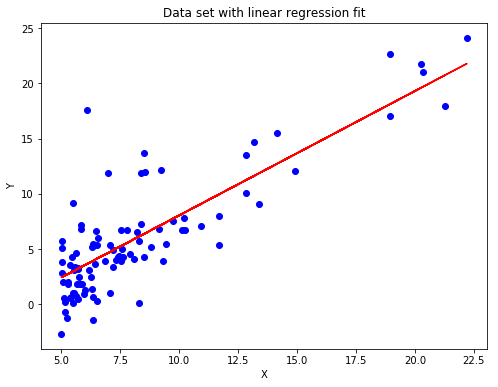

In [104]:
# Adding labels
# Create a Figure object.
fig = plt.figure(figsize=(8, 6))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.
ax.scatter(X, Y, color="blue")
# Add a title.
ax.set_title("Data set with linear regression fit")
# Add axis labels.
ax.set_xlabel("X")
ax.set_ylabel("Y")
# Produce an image.
#fig.savefig("scatterplot.png")
ax.plot(X, w0+w1*X, color="red")

#### Plot convergence of data

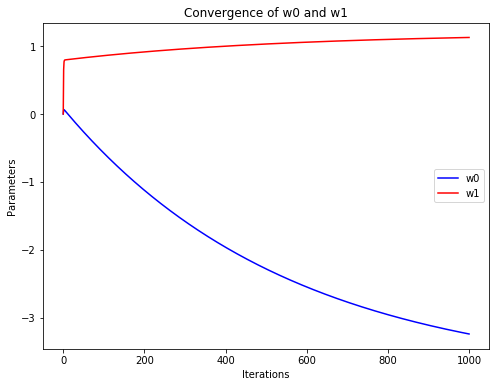

In [105]:
# Adding labels
# Create a Figure object.
fig = plt.figure(figsize=(8, 6))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.    
ax.plot(tplot, w0plot, color="blue", label="w0")
ax.plot(tplot, w1plot, color="red", label="w1")
# Add a title.
ax.set_title("Convergence of w0 and w1")
# Add axis labels.
ax.set_xlabel("Iterations")
ax.set_ylabel("Parameters")
ax.legend(loc='right')

#### Plot convergence of cost function

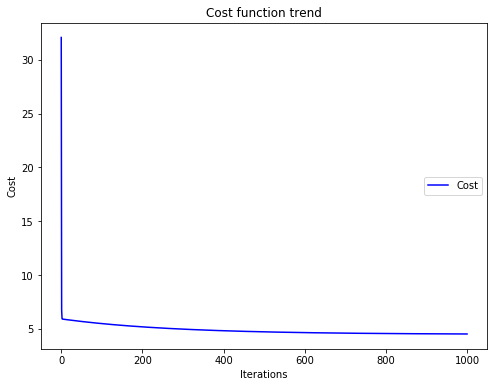

In [106]:
# Adding labels
# Create a Figure object.
fig = plt.figure(figsize=(8, 6))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.    
ax.plot(tplot, cplot, color="blue", label="Cost")
# Add a title.
ax.set_title("Cost function trend")
# Add axis labels.
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.legend(loc='right')

Notice how the parameters and the cost function converge at different rates. We could also try terminating our gradient descent algorithm based on the cost function.